# Programming R from Haskell

This notebook demonstrates integrating both R and Haskell in the same notebook, using `IHaskell-inline-r`.

## Prelude

First, a bit of setup. We need to enable quasiquotation, to embed R code into Haskell expressions:

In [1]:
:ext QuasiQuotes

Next, we need to make sure that R is initialized properly:

In [2]:
import qualified H.Prelude as H
H.initialize H.defaultConfig

## R computations

By default, computations in code cells are interpreted as Haskell code. For instance, here is a definition of the factorial function, in Haskell:

In [9]:
fact 0 = 1
fact n = n * fact (n - 1)

Here is a Haskell expression calling `fact`, together with its value:

In [4]:
fact 10

3628800

`inline-r` allows you to embed R expressions and R statements anywhere in Haskell code, using quasiquotation. The following is an IO action that asks R to print the value of the R code snipped embedded between the brackets:

In [5]:
[rprint| 1 + 1 |]

[1] 2

You can define the factorial function using R code, just as you can using Haskell code, so long as the R code is delineated within a quasiquote:

In [17]:
[r| fact <- function(n) if(n == 0) 1 else n * fact(n - 1) |]

0x00007f7438d9d360

R Runtime Error:  (function ()  でエラー:  関数 "fact" を見つけることができませんでした

The `r` quasiquote is used for embedding R code that is only useful for its side effects. This is the case with the code above which has the side effect of binding `fact` in the toplevel environment. Applying the definition:

In [20]:
[rprint| fact(10) |]

R Runtime Error:  (function ()  でエラー:  関数 "fact" を見つけることができませんでした

## R graphics

R has extremely powerful plotting facilities. They are available out-of-the-box:

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAAC7lBMVEUAAAABAQECAgIDAwMEBAQHBwcICAgJCQkLCwsNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUnJycoKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAyMjIzMzM0NDQ1NTU2NjY3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhJSUlKSkpLS0tMTExNTU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tcXFxdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1ubm5vb29wcHBxcXFycnJzc3N0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICBgYGCgoKDg4OEhISFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OUlJSVlZWWlpaXl5eYmJiZmZmampqbm5ucnJydnZ2enp6fn5+goKChoaGioqKjo6OkpKSlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e4uLi5ubm6urq7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7///8HIQLlAAAXNUlEQVR4nO2daXwUxbqH48UF5ChcwatXr+L1ePG4HyETMklIAglbDIcdFGUPiOwosgkqWzwoKjvIUQQNEBAEj+z7KotCwo4ohDUhZDFhksnUt9s9hB+TmbFnerqql3f+z4carK6ufuFxenqpqjeCAdJEGB0AEAsEEweCiQPBxIFg4kAwcSCYOBBMHAgmDgQTB4KJA8HEgWDiQDBxIJg4EEwcCCYOBBMHgokDwcSBYOJAMHEgmDgQTBwIJg4EEweCiQPBxIFg4kAwcSCYOBBMHAgmDgQTB4KJA8HEgWDiQDBxIJg4EEwcCCYOBBMHgokDwcSBYOJAMHEgmDgQTBwIJg4EEweCiQPBxIFg4kAwcSCYOBBMHAgmjgbBVzOACVhaJkrwtx1nAeOxnRIm+PPQ9wXc6MZBcEVBhZ9aCDYFmgWXjnrizohq9Ubf8N4AwaZAs+AurbblleXtbNfVewMEmwLNgmuVuD/K/9t7AwSbAs2Cn1nu/tj0nPcGCDYFmgXvqft0227tnntwr/cGCDYF2q+iy9bOmjhrre/tNASbAu2CXddccpnvXQ/BupB3WXm7ZsFZT93x2DLpbsmnJQTrQG6LlHaNzyi10Cw4epJjQ51tEGwMnbcxdqyJUgvNgms6Gcv8q8ND8J6JblqlBRkkCJ0YuWh1XaGFZsH1dkg/wKlpHoJ/X+cmNSW4GIEG3IKTShRaaBacUSM2l+W9+LxPywHtAu4LtDJ4FmPfd1Bqof0qOieziDFHxjDvegjWgRvD7fbeSmdoLm+T/APBpgCCiaNZ8NFbeG+AYFOgWXBixN113HhvgGBToP0U3bOX/3oINgXaBW+a6L8egk0BLrKIA8HEgWDiQDBxIJg4EEwcCCYOBBMHgokDwcSBYOJAMHEgmDgQTBwIJg4EEweCiQPBxIFg4kAwcSCYOBBMHAgmDgQTB4KJA8HEgWDiQDBxIJg4EEwcCCYOBBMHgokDwcSBYOKIS6sDwaZAXFodCDYF4tLqQLApEJdWB4JNgbi0OhBsCsSl1YFgUyAurQ4EmwLcJhEHt0nEwW0ScQTcJi2Nd/NInKbAAB9wm0Qc3CYRB7dJxMHrQuJAMHGQVoc4SKtDHKTVIQ7S6hAHF1nEgWDiQDBxIJg4EEwcCCYOBFubX9MnHlFsAMGWZmPcih9afK3UAoItTVw+Y46GLoUWEGxpYr5MajKtzWWFFhBsaZ7oV3xjwoP4BpPl6SZbdrd/0nc4zW0g2NLEHB45fFfrXIUWEGxpWkj6chsptYBgS3PC9u44226lFhBsbRxbNxQrNoBg4kAwcSCYOBBMHAgmDgQTB4KJA8HEgWDiQDBxIJg4EEwcCCZGdp9//NNzzTIIpsXP9gNX57X0GMMDwbR4/ZhU9D1wuwKCxZDVwh4914DjJjqkYuqK2xUQLIQi26+srNuKwA15M2yNVDQ/e7sCgoWw7n2puNhe/wNft7+3oPUUjwoIFsKqdKm49ooBRy7/4Yvjnv8NwULIjS5ibPwco8NgECyK9ZGd7MOUZhzoBQSL4rzD6AjcYEl/4mBJf+JgSX/iIPOZH/7w95NjUbCkvw+H45NtQ5xGR8ELLOnvjcN2jrH0dKPD4IWAJf1/meWmcXONoRnE/kFSUZZgdBi84HQffMXjnv54hptmLUOPykgODmQQ7MGlri8OufLsnY8f9t5g1VN0WdQZxj74xOgweKFZcLPWS5rXnlUxNdZ7g1UFs6PJCVGjyFxHaxZcI5/9dvcNVvwX7w2WFSxdZxkdAEc0C663gn0ZcZQdfMx7g4UFU0Kz4GV31Xng06f61/vYewMEmwLtV9FXdhexzaNX+9RDsCnA60JBOM8UGR2CGwgWww8NX0/ob4ZLcQgWwhV7CWOTZxgdBoNgQaz8SCryU4wOg0GwINaPl4qcjkaHwSBYEMW246z0Vd9bC/2BYDGcSI2zLzQ6CBkIJg4EEweCiQPBxIFg4kAwcSCYOBBMHAgmDgQTB4ItjeuLpolTlRKfQbC1+WjQH44pbym1gGBLY5cHjcQhdyFZYuQCuQvp0vIkY1ejlVpAsF5cW72ulHunJ20j3rPtUWoBwTqxKWryONsJ7t06tm34Q7EBBOtEwwLGThswoxaC9eHmupUx+h8YgvXBEScV5Xb9DwzBOjHgw+LcHrP1Py4E64RzZvIry1Tuc6xNTNJGjceFYPOSJ1115zY9ELihEhBsXr6ZLhX7BmvrBILNy6xFUnGyu7ZOINi8HG1Vwdioxdo6gWDDKFg0W/kfn82NHpg0SONRghN8w6MMFghW5kTDz79u9i/lNkUHlF4UBUVwguvLRelDqnqGYGVSTzJWHqnuSxMCwQiuVi2imoy6JCIQrIz7sWU/nwUCeRPcNziUdUUhWJnEgluFUIK8yDrmciydp24BOAhWZm3TQ2dHDhR+mOAEj7ynfMJTf++hqmcIDsD+vl0Xi0+8E5zg+0+7Htp17T9V9QzBpiA4wffl7avrLKz5J42QVsfEBCe4xzOPT7r8cjN/LZBWx9wEJ7g8Y1FZzoTr/logrY65QVodXzaPnXbV6Bi4EYzg6lvr38RfC3ppdUb32rS4wUmjo+BFMIJ/yDt8E38tyKXVuZQkFUfNsEgdFwSk1fn2BTd1GmsMzSC2jpJLA8Y/iiEYwbVuUvvPU83k+XniZtVv8AV58PIpiwbvSzCC8/M/bLrr4p4W0/21OG4/dfql/6gW/Zv3BqsKZoMH7l0VmWV0FLwI7hT9iLx6+R//469Fg5Flzd4tLR3d1HuDZQWzNUMn5hgdAzeCE/xgtlQce9hfi5o32KOFjDlreW+wrmBSBCd4ct0xX4yt+5G/FjELWYcVjK2jc5tEi+AEu9alpfbb6PfVx5n6zydXaxJfd5f3Bgg2Bdpvk1w75k2cscb3XTEEmwKM
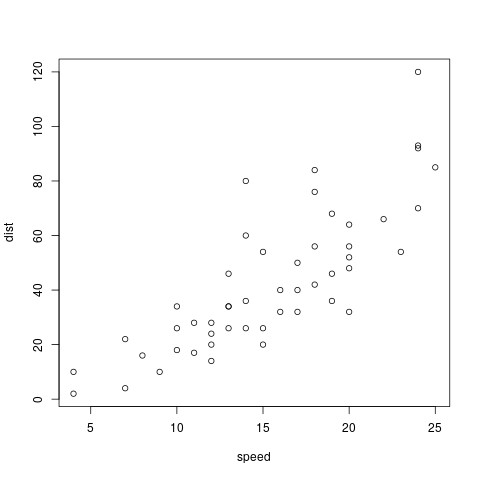

In [11]:
[rgraph| plot(cars) |]

For effect, we can fit a straight line through our data set:

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAIAAADytinCAAAgAElEQVR4nO3dZ0BT1/sH8CdsZA8XuEBwIFatgsUFMhwo4MQ6qlYqSltFHC3YCrZqVRQqbRUrVSrUakUURPnLEFBxjypOFEFBQUCZYYfk/yL9Uaso+95L8v28yr3k5jyk6dfDybnn8EQiEQEAAPfIsF0AAADUDwENAMBRCGgAAI5CQAMAcBQCGgCAoxDQAAAchYAGAOAoBDQAAEchoAEAOAoBDQDAUQhoAACOQkADAHAUAhoAgKMQ0AAAHIWABgDgKAQ0AABHIaABADgKAQ0AwFEIaAAAjkJAAwBwFAIaAICjENAAAByFgAYA4CgENAAARyGgAQA4CgENAMBRCGgAAI5CQAMAcBQCGgCAoxDQAAAchYAGAOAoBDQAAEchoAEAOAoBDQDAUQhoAACOQkADAHAUAhoAgKMQ0AAAHIWABgDgKAQ0AABHIaABADgKAQ0AwFEIaAAAjkJAAwBwFAIaAICjENAAAByFgAYA4CgENAAARyGgAQA4CgENAMBRCGgAAI5CQAMAcBQCGgCAoxDQAAAchYAGAOAoBDQAAEchoAEAOEqO7QKa5uXLl4mJiWxXAQDwDxkZGUdHR3l5+bZ48XYW0AkJCZGRkZaWlmwXAgBARBQSEjJ48ODevXu3xYu3s4AmopEjR7q6urJdBQAAEdGVK1fa7sUZHYMWCoUlJSVCoZDJRgEA2ikmArqystLb29vY2FhRUVFDQ0NBQcHIyMjHx6eqqoqB1gEA2ikmAtrV1TUlJSU4ODg3N7e6ujovLy80NDQ1NXXp0qUMtA4A0E4xMQYdHR2dlZWlrKwsPtTW1rawsDAzMzM0NGSgdQCAdoqJHrS+vn5MTMwbJ5OTk3V0dBhoHQCgnWKiBx0UFOTk5LRu3ToTExM1NTU+n5+ampqbmxsZGclA6wAA7RQTAW1ubp6ZmZmUlJSRkVFYWKilpeXi4mJlZdVGU7sBACQDQ/Og5eTkhg0bZmtry+PxxGdEIlFRUZGmpiYzBQCAdCooKBAIBJ06dWK7kOZgYgz63r17AwYM0NHR6d2799GjR8Unq6qqtLS0GGgdAKTTq1evHB0dXVxcli9fbmtrm5GRwXZFTcZED9rNzW3hwoUrVqxITk6eM2dOp06dRo0axUC7ACDNVqxY8dVXX4nTJjU11c3N7dSpU2wX1TRMBPStW7cSEhJkZWWtra0DAwMXL15869atBq+6cuXK2+siXbx4UV9fv23KBACJ8uzZs7q+YN++fZWUlIqLizU0NNitqkmYGOLQ1dW9fPmy+PGUKVNMTEw8PDwavKpr165D3yIrK5udnd3G9QKABKqurlZQUGC7iqZhoge9efPmCRMmDBs2LCwsTEdHJygoaPz48SNHjnz/Vd27d+/evfsbJ0+ePJmTk9NmlQKA5Bg6dOiePXvEa6udPHlSU1Oz7na59oKJgJ45c+bIkSMvX76sqKhIRNra2ufPn4+MjLx27RoDrQOAdNq0aZOPj4+VlRUR9e/fPzAwkO2KmoyhaXZ6enpTp06tO1RQUJg5c+bMmTOZaR0ApJCiouKWLVvYrqJFsOUVAABHMdGDfvDgwbt+1K9fPwYKAABoj5gIaHd399jYWCUlpbcnuLx48YKBAgAA2iMmAjomJmbJkiU8Hm/37t0MNAcAIBkYGoOePXu2gYEBM20BAEgGhmZxWFlZiSe7AABAI2EWBwAARyGgAQA4CgENAMBRCGgAAI5CQAMAcBQCGgCAoxDQAAAchYAGAOAoBDQAAEchoAEAOAoBDQDAUQhoAACOQkADAHAUAhoAgKMQ0AAAHIWABgDgKAQ0AABHIaABADgKAQ0AwFEIaAAAjkJAAwBwFAIaAICjENAAAByFgAYA4CgENAAARyGgAQA4CgENAMBRCGgAAI5CQAMAcBQCGgCAoxDQAAAchYAGAOAoBDQAAEchoAEAOIrRgBYKhSUlJUKhkMlGAQDaKSYCurKy0tvb29jYWFFRUUNDQ0FBwcjIyMfHp6qqioHWAQDaKSYC2tXVNSUlJTg4ODc3t7q6Oi8vLzQ0NDU1denSpQy0DgDQTskx0EZ0dHRWVpaysrL4UFtb28LCwszMzNDQkIHWAQDaKSZ60Pr6+jExMW+cTE5O1tHRYaB1AIB2iokedFBQkJOT07p160xMTNTU1Ph8fmpqam5ubmRkJAOtAwC0U0wEtLm5eWZmZlJSUkZGRmFhoZaWlouLi5WVlby8PAOtAwC0U0wENBHJy8vb2dkJhUI+n6+qqiojg/nXAAANwDQ7AACOwjQ7AACO4u40u/Dw8N27d79x8uHDh0ZGRm1VKAAAlzAR0OJpdlOmTHn9ZIPT7KZPnz59+vQ3Tnp4eOTk5LR+iQAA3INpdgAAHIVpdgAAHMXoNDtm2gIAkAyYjwwAwFFM9KAfPHjwrh/169ePgQIAANojJgLa3d09NjZWSUlJQ0PjjR+9ePGCgQIAANojJgI6JiZmyZIlPB7v7XnNAADwLgyNQc+ePdvAwICZtgAAJANDszisrKysrKyYaQsAQDJgFgcAAEchoAEAOAoBDQDAUQhoAACOQkADAHAUQ7M4AACY9+TJk/DwcIFAMHny5AEDBrBdTpOhBw0AkikxMdHFxcXIyGjQoEFeXl5//vkn2xU1GXrQACCZNm7cGB4erqmpSUTW1tZWVlazZ8/m8Xhs19UECGgAkExCoTAqKurgwYNCoXDSpEndunXLz8/v1KkT23U1AYY4AEAyPXv27MqVK2FhYZGRkWVlZcnJyR07dmS7qKZBDxoAJJOSktKjR4+uX7+uqKh469YtdXV1gUDQvjZyQg8aACSTrq7u9u3b4+Lijh075u7ubmpqWlJSwnZRTYMeNABIJjU1NWVl5Q0bNhDRq1ev8vLydHR02C6qaRDQACCZ/Pz8FixYYGVlpaioGBMT4+fnx3ZFTYaABgDJZGxsnJCQcPny5ZqampUrV6qoqLBdUZMhoAFAYikoKIwePZrtKpoPXxICAHAUAhoAgKMQ0AAAHIWABgDgKAQ0AABHIaABADgKAQ0AwFEIaAAAjkJAAwBwFAIaAICjENAAAByFtTgAAP51//79n3/+OT8/f8SIEZ9//rmioiKLxaAHDQDwj5SUFDc3t8WLFwcGBmpoaDg7O4tEIhbrQUADAPxjx44dv/7665AhQ3R1dRctWtS9e/ebN2+yWA8CGqAduHfvnqOjo5WVlaWl5d69e9kuR2I9f/7cwMCg7tDIyCgzM5PFehDQAFzH5/NdXV1/+umnpKSk+Pj4ixcvRkZGsl2UZBo8ePDp06frDk+fPj148GAW68GXhABcd+nSpYkTJ/bq1YuI5OXlN27c6OHh4eTkxHZdEmjt2rVOTk5Xr17t2bNnVFSUpaVlz549339J3xcveNXVbVQPAhqA6yorK5WUlOoOFRUVq6qqWKxHgmloaMTHx8fHx7948eKHH37o06fP+56dnU0eHmaPHxOP10b1YIgDgOssLCyOHz/O5/PFhzt37rS3t2e3JAkmJyc3YcKEhQsXvi+dhULas4dmzSJ39z9GjhTJy7dRMQhoAK7T0dHx9vYeP378vHnzrKysSktLXVxc2C5Kit26Rba2lJ1Np0/TiBFt2hSGOADaARsbGxsbm+fPn3fs2FFBQYHtcqRVeTl9/z3dv0/79lGvXgw0yGgPWigUlpSUCIVCJhsFkBj6+vpIZ9ZERZG1NZmYUGQkM+lMzAR0ZWWlt7e3sbGxoqKihoaGgoKCkZGRj48PvugAgHYgO5tmzaITJyg2lubPZ7JlJgLa1dU1JSUlODg4Nze3uro6Ly8vNDQ0NTV16dKlDLQOANBMAgEFBNCsWbRyJf36K6mrM9w+E2PQ0dHRWVlZysrK4kNtbW0LCwszMzNDQ0MGWgdpVl5erqSkJCODL8Oh6f7+mzw8aOJESkwkOXa+rmOiVX19
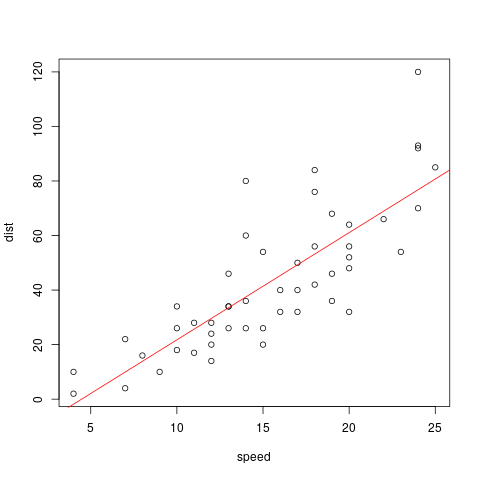

In [12]:
[rgraph| plot(cars); abline(lm(cars$dist ~ cars$speed), col="red") |]

R code snippets that have graphical output should be embedded using the `rgraph` quasiquote. The other quasiquotes ignore graphical output. For a more complex example, consider the following density plot (requires `ggplot2` to be installed):

In [13]:
[r| require("ggplot2") |]

0x00007f7438003388

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAIAAADytinCAAAgAElEQVR4nOydd1gUxxvHBxB7ixqNmqixRaNRf7HEjgLSe1NBiiJRaYK9g4gdbIhiQayIYkFRQQSMChYUhWBUQASkCBy9X9v5/TFmHPYKxwFymP08Pj7L3uzs7N3t92bfeYschBAwMDAwMMge8i09AAYGBgYG4TACzcDAwCCjMALNwMDAIKMwAs3AwMAgozACzcDAwCCjtPnK54uJiamsrGzTpsHn5XK5ioqKzTGkFgS50MjJybX0QJqYb/LDoihKXv5bm9Awn5TskJmZ+eOPP6qrq5M7v7ZAAwCUlJQ6dOjQ0KOqq6s7dOjwjWkZn88HACgoKLT0QJqYqqqqTp06tfQomhIIIY/H+/a07Nv7pAAAPB5PQUGh1WnF/fv3ORwObWfr+51hYGBg+I/ACDQDAwODjMIINAMDA4OMwgg0AwMDg4zCCDQDAwODjMIINAMDA4OMwgg0AwMDg4zCCDQDAwODjPK1A1UghBRFURQl3YGtzvlcPCiSUIp3Q8ZBH1ZLj6IpYT6p1gWEsNVluhc64BaIJJTuvWuN77iEfHvX9e19WOhyvrGLAt/iJwW+rYv62gItJyenoKAgRXCzvLx8awzfFM+3GuqNPqyWHkVTgkK9v7GLAt/iJwUAgBDKy8u3Oq0QOmDGBs3AwMAgozACzcDAwCCjMALNwMDAIKMwAs3AwMAgozACzdAysNnssLCwhw8ffjML7gwMTQ4j0AwtQHV1ta6urpaWlpKSkrW1dUsPh4FBRmEEmqEFiIiIuHfvHto+d+5cZmZmy46HgUE2YQSaoQWg1Y769kpJMTA0CYxAM7QAampqBgYGaHvFihX9+vVr2fEwMMgmLRDqzcCgqKh47dq1hISEzp07Dxs2rKWHw8AgozACzdAyyMnJ/e9//2vpUTAwyDSMiYOBgYFBRmEEmoGBgUFGYQSagYGBQUZhBJqBgYFBRmEEmqH1ASGMiooKCgoqLS1t6bEwMDQjjBcHQ+tjyZIlJ06cQNv5+fm9e/du2fEwMDQTzAyaoZVRUVGB1RkAcPXq1RYcDANDs8IINEMro23btuSfHTt2bKmRMDA0N4xAM7Qy2rVrt2/fPrSto6NjZmbWsuNhYGg+GIGWadLS0iwtLXV1dc+fP99UfUZGRp49e7agoKCpOvz6uLq65uXlvX379ubNmx06dGjp4TAwNBfMIqFMs3Tp0sjISADArVu3Bg4cOGPGDPLV6urqW7duKSoq6ujoSJgQztnZ2cfHB21nZGQMHDiwycf8dejTp0+fPn1aehQMDM0LI9CyS3l5OVJnxOPHj0mBrqmp0dfXRw10dHRCQkIUFBTEd8jlcrE6AwCCgoLWrl3b1KMWTnEFKK38918FKK8G5dWgshqUV4MaNuDyAY8HajgAAKCoANq3AwCAzu1B106ge2fQrRPo8x3o2xP06wV6dv0642VgkAkYgZZdunato0aTJk0i/3z06BGW71u3biUlJY0bN058hzQF79KlS1MMEwAAKAoUlQNWGSgsA6xS8KmwbUklKCoHhWWgqByUVAAIQffOn//16Aq6dARdOoD+34MRHUE7RdBOEcjLg87tAQCglgM4PAAAqKoFZZWgtAqk54Fnb0FuEcgrAnJyYEh/MGIAGDkAjBwIhv8I5BkrHcO3CyPQMs2bN2/c3d2rq6v19PRmz55NvtS5c2cxfwpFXl7+1KlTixYtAgBoampaWVk1aDBVtSC/BLBKAasU5JeAwrLP/7NKQVE5aKMAenUD33cD33cH3TqCAX3A+OGgZzfQqxv4rjP4rguQk2vQ2YQAISgoBanZ4G0miEkCJ26BGg6YNAJMGQWmjAJ9vmts/wwMsobcVy7ZGRMTM378eCkWdqqrqzt06CDX+LtcluDz+UBgYishEEI7Ozt/f38AwKpVq/bu3SvhgaWlpSwWa8iQIfLCJp8UBfJKwKcikFcMcgvBp2LAKgX5xSCvBNSwQY8u4PvuoHd30Ps70Ksb6P0d6NUV9OkBenYF3YkfiKqqqk6dOklxUQ0l/RN48gY8/QfEp4BffgJak4HaRNC1GfzuIIQ8Hu/bq/zy1T6prwmPx1NQUGh1WnH//n0Oh6Ourk7u/NYEuqam5uTJkx8/fjQ0NJw6daq0w/waeHh4uLm5zZkzZ82aNaqqqtJ1kpmZqaioKF1FEg4P5LBAFgtkFYCP+SCnEOQUgk9FoK0i+KEH6N8L/NAD9O0Ben8HfugBencH33cHipI9cX39276WA+6/ArefgoT3YNpoYKwEJo1oyv4ZgW5FMAItPc0t0FZWVufOnUPbT548mTx5sjSjbH4iIyPnzJmD/+RwOM1981ezwYdckJoNMvPBh08gMw98KgLdO4Mfe4OfvgcD+4D+34P+vcCP39eZC0tHC972BaXg9hNw5QHo2gnMVwYaf4C2TWHGYwS6FfEtCfQ3ZYOmKAqrMwDg5s2bMivQqamp5J8sFqvJ6/IVlYN3H8HbTPDuI0jNBp+KQb+eYGh/MOgHoDYB/NwXDOwDOkvlQ5yRkSEnJyehi15tbe2RI0fevXunoaFhZGQkzfkaQu/uYKEmsFIHUS9BYCQ4fB1YqQOz2U0j0wwMX5lv6mtLM6rKspMvueKnpqbWJOrM44PkLPB3Gvj7A0hMAyUVYFh/MGIgmDoaLNQEg/uCDu0afxKwdOnSY8eOoY2jR4/W237FihWo2YkTJ65cuWJsbNwEg6gPBXmgNgGoTQAJ78Hh6+DSfbBMH2hMAvKtbFLF8F/nWzNxxMTEIGfhhQsXHjt2TJafSZ88eXLq1KmePXu6urpKHXNBUeBdFniRDJ6/AwnvQdeOYOxQMHYI+G0wGP4jaCN29ZHP51+4cCExMVFZWVlbW1uS0yUkJJCFBF+9eiXUt498cCY/soULF546dUqSEzUtDxLB4etAsQ1YNRf8LlWJWsbE0YpgTByyy/Tp07/yT47UTJkyBbk2S+HFUVIBHv8DYpPA0zegXVsw8RcwZwLYYAH69mxAJ+7u7p6engCAffv2nT9/3sLCQlSzrVu3amtrb9iwgfZSdXV1vWfR19e/ceMG2pawgDePx2vTpim/mUpjwfTfwI0YsPooUBoHXIxB129NlBi+UeDX5dGjR9XV1VIcWFVVRVFUY04dGBhoZWW1a9cu6QYgikOHDmloaOjq6j59+rShx/J4PB6PJ3n7/BJ44R602QWn2MOl++C5CPght6Hn/IKWlhb+GpiYmAhtc+vWLfLbwmazNTU10baWlhaHwxF6VGVlJd5+9+6drq4uAMDGxqbedz4zM1NNTQ31r6qqmpycLPXVCaWoHG7yh3NWwttPGnYgRVGiLrZVQ35S3wxcLreRWtEiREdHh4eH03Z+azNoUQQFBZmbm6PtjIwMSYynkvDw4UNnZ2e0HRoayufzhToXN5LKGhDxHIQ/B/+kgymjwHwVMG006NQevHz5MvBU2PDhw42NjaU4L2loGjBggNA27969I/+srq4OCQm5ffs2AEBbW1uSR/5ffvnl5s2bEg5p8+bNERERaDsyMnLt2rXXr1+X8FhJ6NEFbFsEnr0FOy+AyHiw2Qp812TRlAwMzcBX/pVoqRm0jY1Nc1z14cOHyW5zcxs2oa13Bv02E247C2c4w2X74M1YWEG8cw8fPsTnXbFihRSDT05ORtNhQ0PDoqIiCOHr16+XLFmydOnSN2/eoDYvX77EZ9HU1BTspLa21svLy8rK6syZM/gDknpepqOj83W+n9W10PMcVFsFH7+WqD0zg25FfEsz6P+KQO/cuRPf84aGhlL3QyMhIQF3q6Ki0qARvnv37tq1azk5OYIv8SkYGQ+td0JlV7g/GGbmCzncwcGhaYWsuLiY7LC0tBTtj4yMtLa2XrNmTX6+kHGsWLECH3LixAm0U+rb3s/PjxyDo6OjdP1IQllZ2Z3HNcqu8NBVyOPX
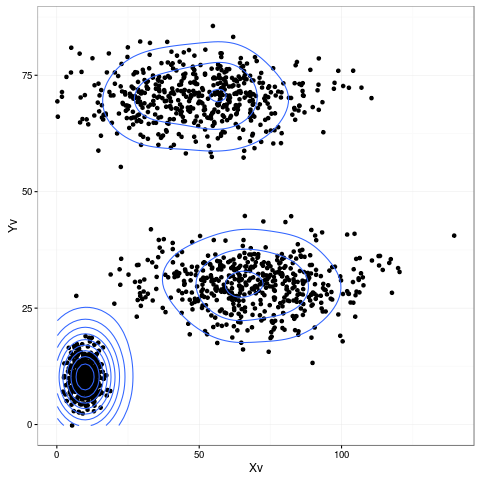

In [14]:
[rgraph|
  Xv <- c(rnorm (500, 10,3), rnorm (500, 50, 20), rnorm (500, 70, 20))
  Yv <- c(rnorm (500, 10,3), rnorm (500, 70, 5), rnorm (500, 30, 5))
  myd <- data.frame(Xv, Yv)

  ggplot(myd, aes(x = Xv, y = Yv)) + geom_point() + geom_density2d() + theme_bw() |]

## Test


<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAIAAADytinCAAAgAElEQVR4nOydeTwU///A33sv6z6ikLvSLVTIHTroLqSkW+mgW7pLB93pW6FDSTp8KiLlTHdSSqJy5CYs6961x++P9+czn2kcbRL6feb56NFjZnZ25r1j5jWv9+skCAQCgIODg4PT+yD29ABwcHBwcNoGF9A4ODg4vRRcQOPg4OD0UnABjYODg9NLIXfbmRoaGrrhLAQCgUKhcDicbjjX74BEIvF4vJ4eRSehUChcLvcPdTv/0VeeTCbz+Xw+n9/TA+kMRCJRIBD8ubcNAKAL7xwGg4Fe7T4B3dTU1A1nIZFIIiIiLBarG871O2AwGN1zoX4HIiIiDQ0Nf6iY+6OvvISEBJfLZbPZPT2QzkCj0Xg8HpfL7emBdAZRUVECgdCFdw5GQOMmDhwcHJxeCi6gcXBwcHopuIDGwcHB6aXgAhoHBwenl4ILaBwcHJxeCi6gcXBwcHopuIDGwcHB6aXgAhoHBwenl4ILaBwcHJxeCi6gcXBwcHopuIDGwcHB6aXgAhoHBwenl4ILaBwcHJxeCi6gcXBwcHopuIDGwcHB6aXgAhoHBwenl9J9BftxcHCE56+//rp3717//v3XrFkjIyPT08PB6RlwAY2D0+uIi4tbvnw5XC4oKLhw4ULPjgenp8BNHDg4vY4nT54gy5GRkX9ovz6cXwcX0Dg4vQ4dHR1k2crKikAg9OBgcHoQXEDj4PQ6Zs+e7eHhAQCws7Pbu3dvTw8Hp8cgdNvsqbKyshvOQiKRpKSkqqqquuFcvwMGg9HQ0NDTo+gkMjIyLBbrz+3q/edeeQkJCTabjXf17n5gV+8uvHPk5OTQq7gGjYODg9NLwQU0Dg4OTi8FF9A4ODg4vRRcQOPg4OD0UnABjYODg9NLwQU0Dg4OTi8FF9A4/1H+0HBAnP8UuIDG6Xm4PFDXRED/a2T/xty5r1+/Ojg4KCoqOjs7l5eX/74T4eD8InixJJzfTm0joayaVF5NKqsmVrBIrAZCTT2R1UCsbSS0cAn1zYQOkqXERAR0qoBBE4jSBaI0gZgIX1JUICbCFxcVSIrypcT40mICSQZfisEnCq1s+Pj4JCQkAAAePnzo6+t75MiRrviVODhdDy6gcbqe4ipSVgE5r5ycW0rOLSPVNxHlJHiKMnwFKZ6CNF9Fji8tLpBk8CVF+VQKYND4FDKgU78T0i1c0NxCEAhAI5vYzAGNbGJjM6GBTahtINQ3E2sbCd9qSKwGQk0DsbqeyKon8AQEKQZfRpwvK8GXleDLSfDlJXlyEvw+Uvw+UnwK+buD19fXI8sVFRXddFFwcH4eXEDjdA0lVaT4dMKrj4z0PHIzh6DTv0WzL896VLO6IldFnkf6SVsahQygVJUQhZbiH9iLaxsJ1XXEqjois45YWUuqqiV+LiJ/YxErWKS6RoKMOL+PFF9Rmqcow+snwx88Zn7y8yxOQxEAYNKkSZ36uTg43QFei6N38WdVhOALwKdCyoss6otM6jcWcfQgMFilaYgqR0ORK7zB4XfTxCF8qyaW15DKqollTFJZNamkilhUQRAIeLKMhkHqov3leaoKvIGqFBnRejKpp4fbKfBaHD3F767F8Udq0CUlJbt372axWDo6Ot7e3mTyH/kr/mhyy8iJ72hJ72gCAMYO4iyd1DBCo0VBXprFYve26AgRqkBVgaeq8O+o2Gz2unXr70S/GGs2W3bgUlZj/8gXFP8IckMzvX8frmZfnroiV12Bq9mPKyGKF2LG6Un+SNG2bdu2yMhIAEB8fHy/fv2WLl3a0yPqjdTV1fn6+ubk5Ojr669Zs6ZLXmN1TYTYN/QHqXRmHdFkKHvTnLqhqi1/XLHi8+fP37hxHQCQHHWY0vw2LCwMAMBgMIq/NeWVknJKyTml5Lg3tPxvZDlJ3gAl7gAlrk5/7kBlLsaWjYPzu/kjBTSUzpD09PQeHMnvJjk5OTAwkEgkrly5csyYMT/13V27dl2+fBkAEBsbS6PR3N3d0Z9mZmampaWNGDFi8ODBwhztSzH53kt6cjptqFrLQusGPW0O5c+5d1gs1rp16yIiIqytrX18fAoLC5GP4uPjkWUpBl9Xi6+r1QJXW7iE7BLSl2LylxJKzGv6txqithJ3mDp3uDpnmDqXigtrnN/Pn/OQoXB0dIRaDwDA2Ni4Zwfz+ygrK5s5cyZcjo6O/vTp0081D4XSGZKSkoL+6P79+y4uLnA5ICBg+vTp7R1EIACpX6hhj0QKvpFs9dln1tQoSvcuC4YwHDt2LCIiAgAQGxsrIiIyb968oKAg+NH8+fPb+xaFLNDpz9XpzwWgGQBQXU/MyKek55EDosVKmcRh6i162i1jBnKU5Hr7BSkqKnrz5s3gwYO1tLR6eiw4P8cvCeiGhoaDBw/yeLw+ffqsXbuWy+WePHmyvr5eVVXV1dW1i0bYBvv27ZOVlc3OzrayspozZ87vO1HPkpmZiV79/Pnz2LFjhf+6k5PTtWvX4PLIkSPRHyGvNwDArVu32hTQfAF4/IF2/ZFIQxNhlkmTrT77z9UZCwoKkOXGxkYLC4tbt27FxMRoamp2IKAxSIvxxw1hjxvCBqChkkVMzaamfqFcTRCVk+Ab6rCNBnO0lbhda+35+vVrQUGBrq6uuLh4pw/y/PnzKVOmwOWzZ88ir3ycP4JfEtCPHz/W1dWdMWPG0aNHv3z5Ul5e3q9fPycnpwMHDhQWFqqoqHTVKDFISkru2rXrNx2894BuTAcAGDBgwE99fffu3VQqtaSkZNCgQStXrkR/RKPRkGUqlYr5okAAnn2kXY4TBQDMMW00H8H+2SC5boDNZsfHx4uIiJiZmRF/FDIyYcIExCw2bNgwAICZmZmZmVmnzy4nybfVa7bVa27hgnd51GcfqbtCJChkYDGCbT68WU2hC3Tq4ODgDRs2wOXXr1+rqqp27jiXLl1Clm/duoUL6D+LXxLQ8vLyjx8/ZjKZVVVVUlJST548GTp0KABAXV39y5cvv09A/0dQVFS8detWUFAQgUBYuXLlT9k3AADS0tKHDx9u8yNPT8/bt2/DZdj7DuH1Z2pwnGhDM2GeZaP5CDaxVzoAm5qaXFxckpKSAAD29vbnz5/vuK3qnDlzGAwGvD8dHBy6cCQUMtDX5uhrc1ZNAR++UhLSaBsCpeQleTZ67PG6zeIinZ9zINIZABAcHLxjx47OHQf9Av7hmwynt/FLcdAsFmvbtm1iYmIUCmXbtm0BAQETJ07U1NSMi4tramqyt7cHAGzdujUjI4NEIt28ebPrht0RJBKpt0V6CQ+RSOTz+d1wIjabnZeXp6amRqfT4ZZPhYTjtwjFlYRFE/l2hgJ0RDCbzQ4NDa2oqJg1a5aGhkZ7x0Rf+WfPnr169WrMmDGGhoZwS2ZmZk5OjrGxsbS09C8OPjo6Gpm2AwAyMjIGDhxYWVnJ4XD69evXuWN21ZX/VlmzdP2lT8zB0soWFiO5LhNFB/XvzCOGjrrZtGnT/v37O9iZSCQKBII2n+WPHz8OHz4cLj98+NDS0rITg/mtwJdrtyVkdC3wnddVz2xzczODwUBv+SUN+saNGwsWLNDX1w8PD09KShIVFa2qqtLU1KyqqpKXl4f7uLm5NTQ0EAiEurq6XzmXkBCJRHFx8e451+9ARESkqampe86lpKTU0tLS0tLCrCNeiKE//kBxNGfvW9BMpYCmxu/2dHV1vXv3LgBg69ataWlp7U23JSUlGxoa+Hx+WFjYihUr4MYzZ844OjqeO3duy5YtcMvr1681NTV/ZeSY54HP53t5efn5+QEA5s+ff+LEiY4V6jbpqiu/e6d31NVzAACahAaVdeB19mwlOf4cU7bRkJafmo4cP34cmdyMHTu241uawWC0tLRwOJzWH6moqBQXF2dlZWlqakpKSvbCR4NKpfJ4vD9UqaLT6QQCoaueWT6f35UC
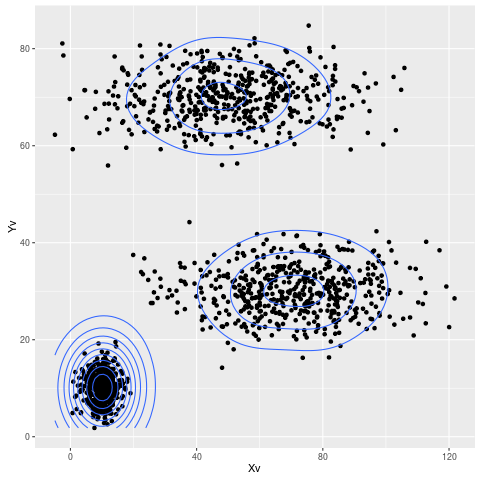

In [15]:
[rgraph|
  Xv <- c(rnorm (500, 10,3), rnorm (500, 50, 20), rnorm (500, 70, 20))
  Yv <- c(rnorm (500, 10,3), rnorm (500, 70, 5), rnorm (500, 30, 5))
  myd <- data.frame(Xv, Yv)

  ggplot(myd, aes(x = Xv, y = Yv)) + geom_point() + geom_density2d()|]